In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#reading the csv file
data = pd.read_csv(os.getcwd() + '/data.csv')
data.head(10)

,SYS_LOC_CODE,obdiffcard,obdiffhbp,obdiffkidney,obdiffliver,RACE__1,RACE__2,RACE__3,RACE__4,RACE__5,...,ivf,MULTIFETUS,pptypelabor,ppinduct,pppretlabw,pppreeclampsia,vitd,vitdfreq,cal,calfreq
0,1001,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,1006,NaN,NaN,NaN,NaN,1,1,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,1009,NaN,NaN,NaN,NaN,0,0,1,0,0,...,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1012,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN
4,1013,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
5,1014,NaN,NaN,NaN,NaN,0,1,0,0,0,...,0.0,0,3.0,NaN,33.0,NaN,0.0,NaN,0.0,NaN
6,1015,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,1018,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0.0,0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN
8,1019,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
9,1020,NaN,NaN,NaN,NaN,1,1,1,0,0,...,0.0,0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [36]:
data.describe()

,SYS_LOC_CODE,obdiffcard,obdiffhbp,obdiffkidney,obdiffliver,RACE__1,RACE__2,RACE__3,RACE__4,RACE__5,...,ivf,MULTIFETUS,pptypelabor,ppinduct,pppretlabw,pppreeclampsia,vitd,vitdfreq,cal,calfreq
count,1859.000000,2.0,2.0,2.0,2.0,1859.000000,1859.000000,1859.000000,1859.0,1859.000000,...,1858.0,1859.000000,943.000000,82.000000,36.000000,106.000000,1759.000000,10.000000,1759.000000,27.00000
mean,3870.828402,0.0,0.0,0.0,0.0,0.465842,0.026896,0.006455,0.0,0.001614,...,0.0,0.001076,1.173913,2.621951,32.861111,94.632075,2.277430,1.900000,1.657760,2.37037
std,2406.773756,0.0,0.0,0.0,0.0,0.498966,0.161824,0.080105,0.0,0.040150,...,0.0,0.032791,0.471568,1.253541,3.958014,971.159242,47.598115,0.875595,39.764251,0.92604
min,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,1.000000,1.000000,22.000000,0.000000,0.000000,1.000000,0.000000,1.00000
25%,2329.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,1.000000,1.000000,32.750000,0.000000,0.000000,1.000000,0.000000,1.50000
50%,2844.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,1.000000,3.000000,34.000000,0.000000,0.000000,2.000000,0.000000,3.00000
75%,7015.500000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,1.000000,4.000000,36.000000,1.000000,0.000000,2.750000,0.000000,3.00000
max,8312.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,0.0,1.000000,3.000000,4.000000,36.000000,9999.000000,999.000000,3.000000,999.000000,4.00000


## Correlation Analysis

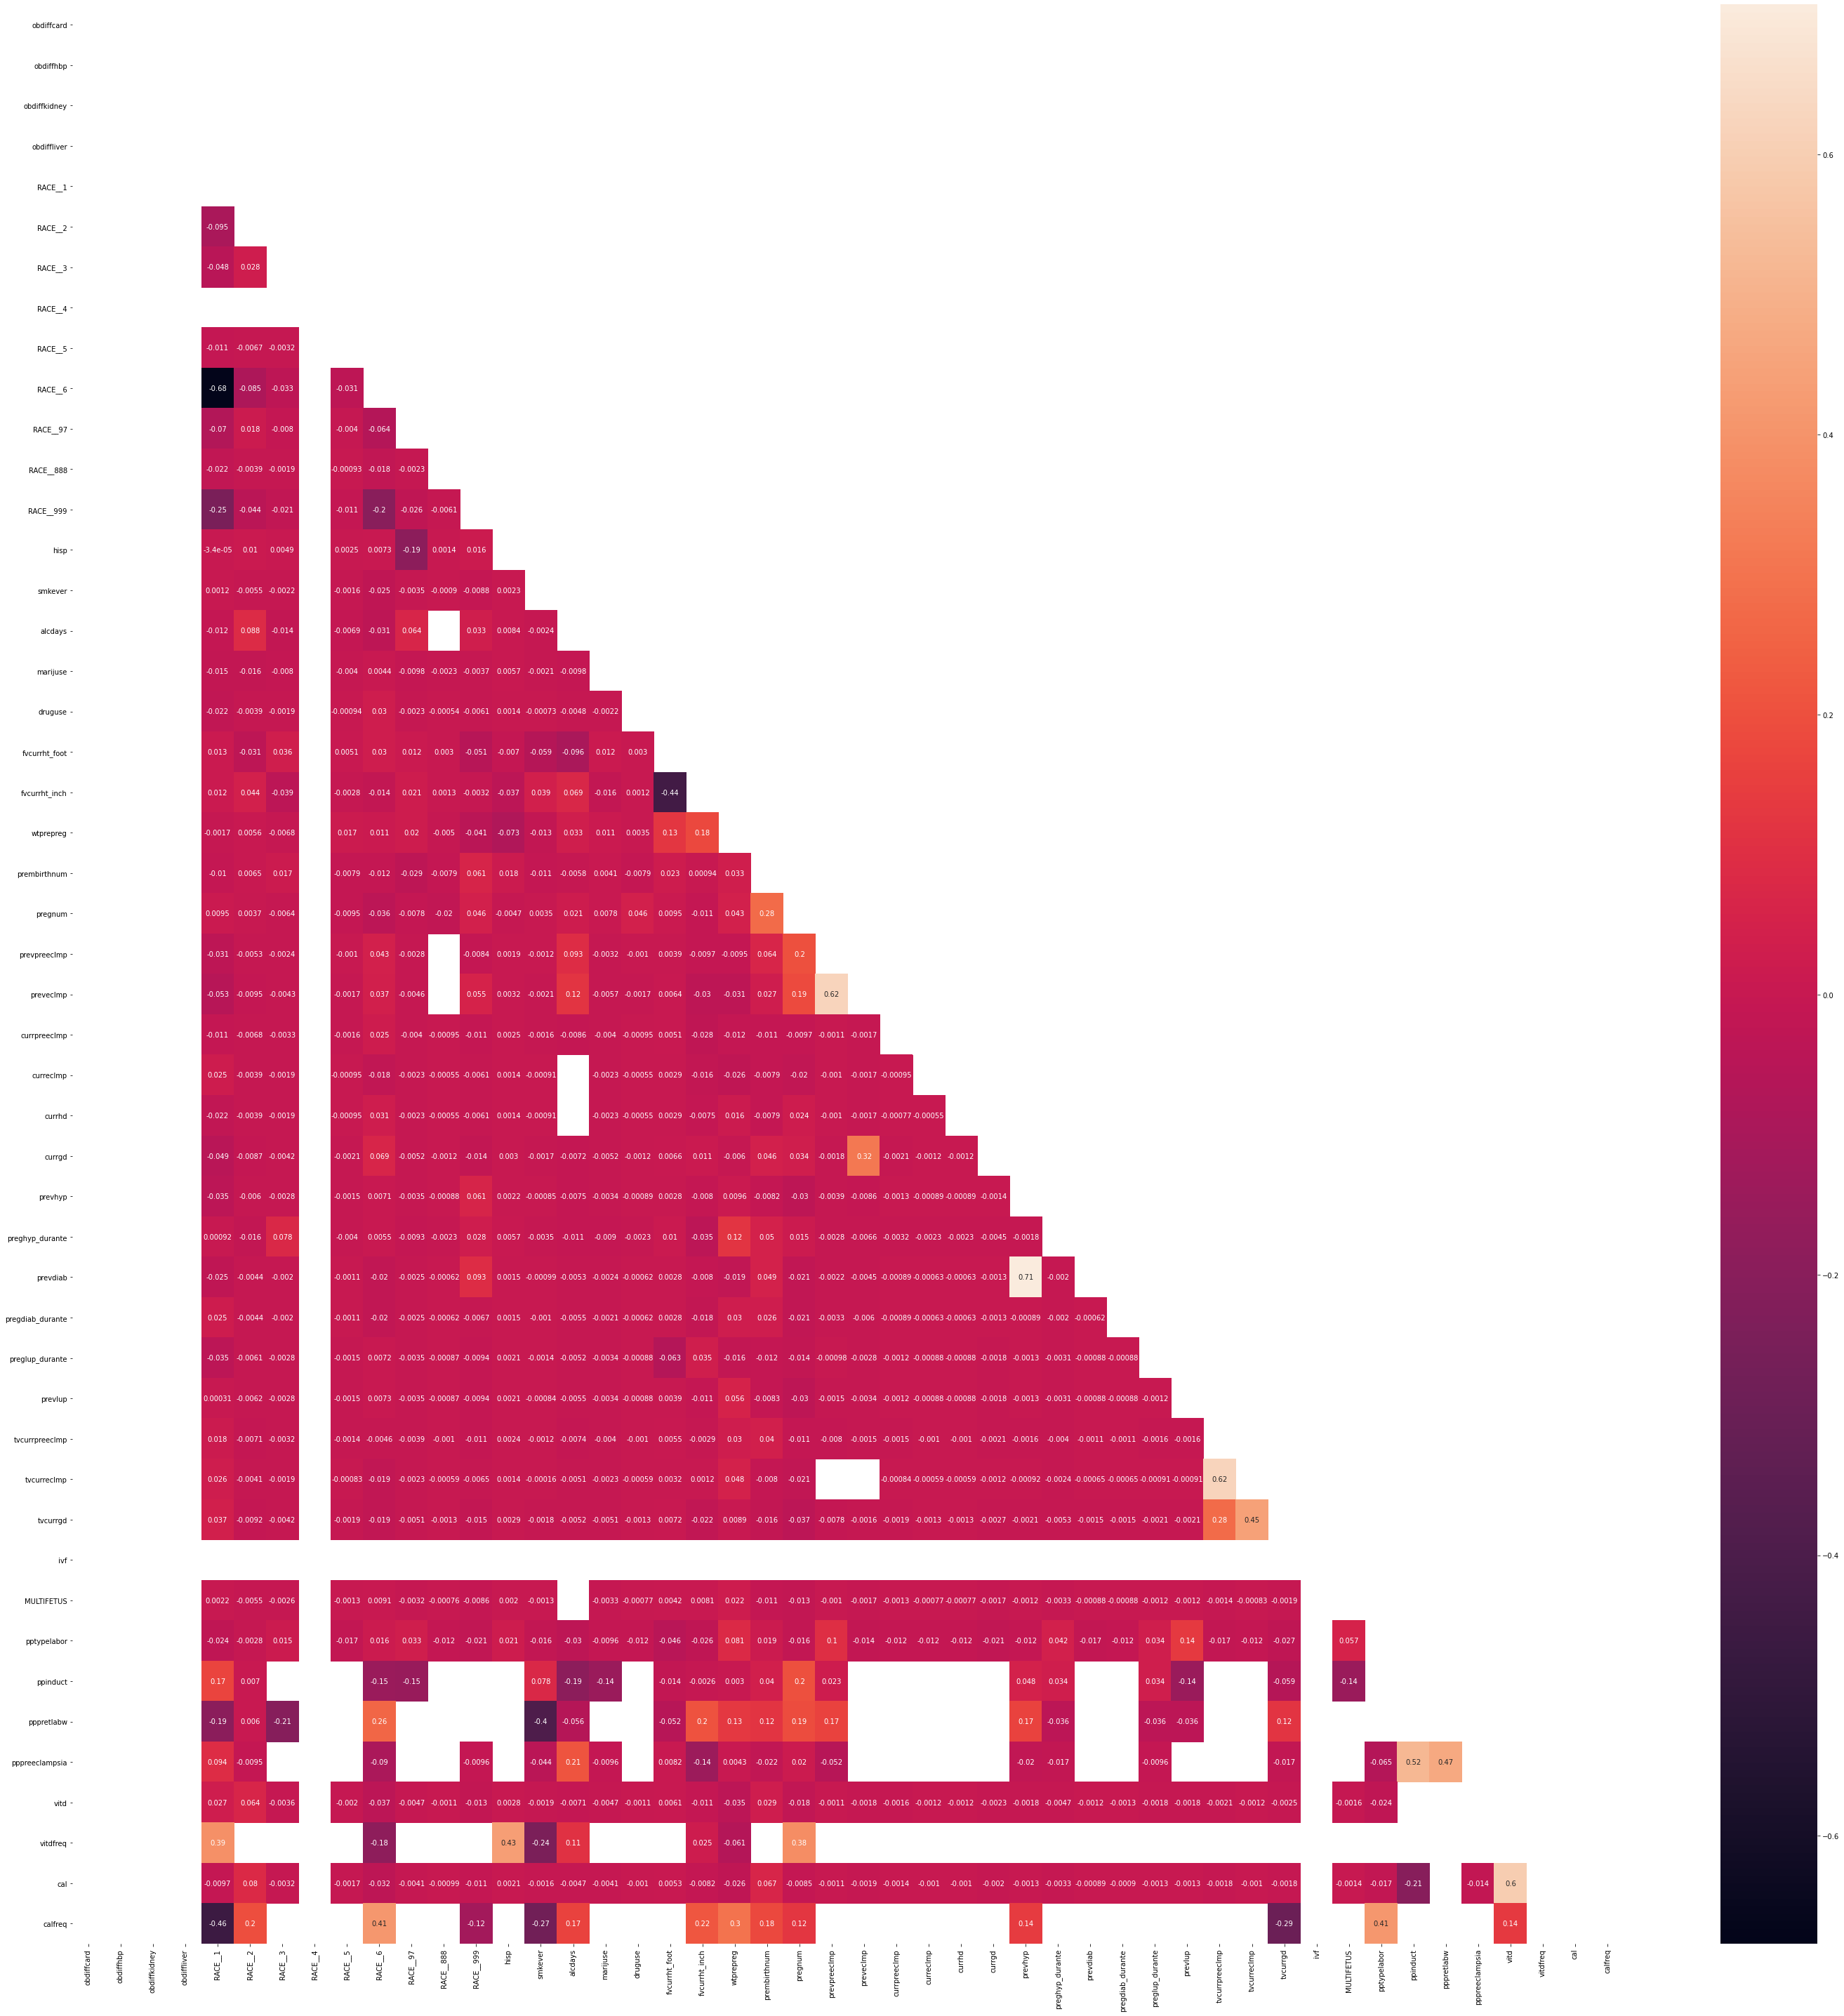

In [37]:
corr_matrix = data[data.columns[1 : 50]].corr()  # get correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))  # upper triangle mask

# plot
plt.figure(figsize = (40, 40))
sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.tight_layout()
plt.savefig(os.getcwd() + '/Graphs/EDA/heatmap')
plt.show()
plt.close()

#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.


# Checking for missing values visually


<AxesSubplot:>

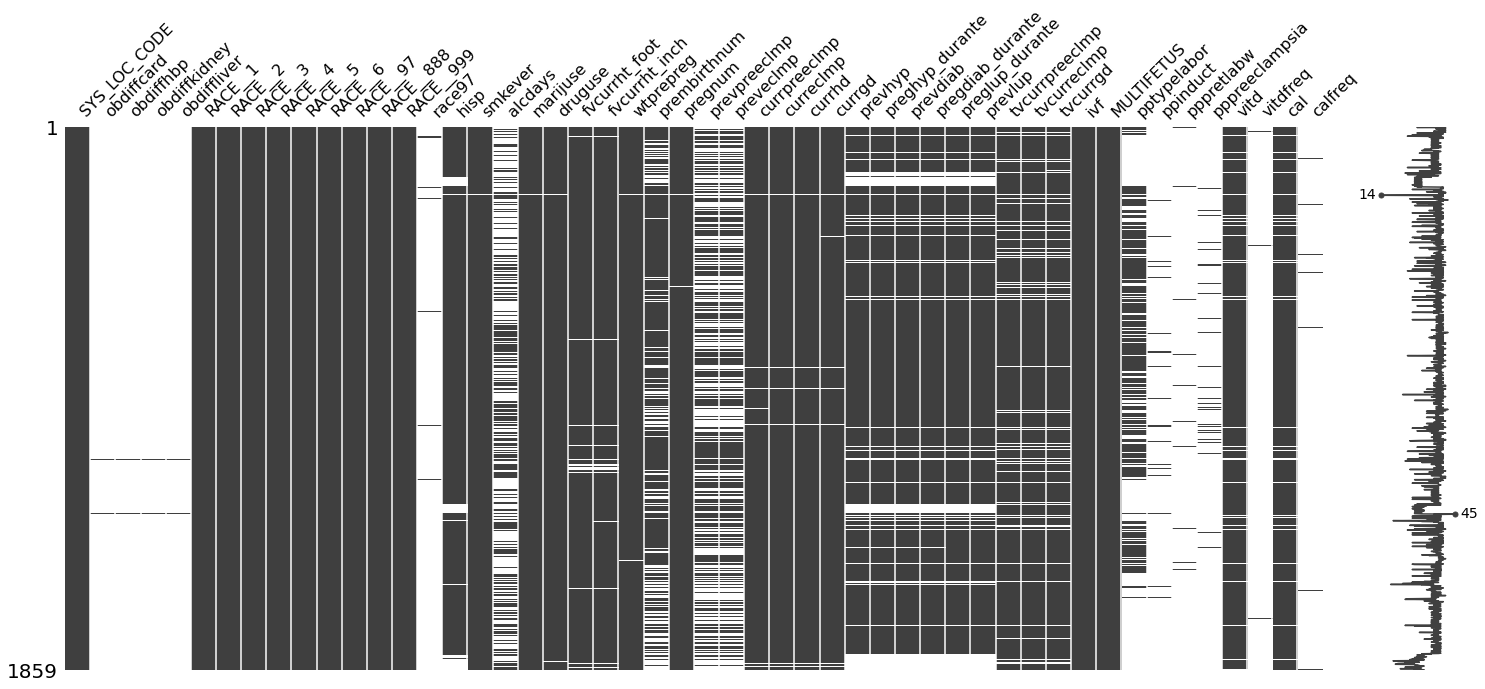

In [39]:
import missingno as msno
msno.matrix(data)

Using the matrix, we can quickly find the pattern of missingness in the dataset. The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

<AxesSubplot:>

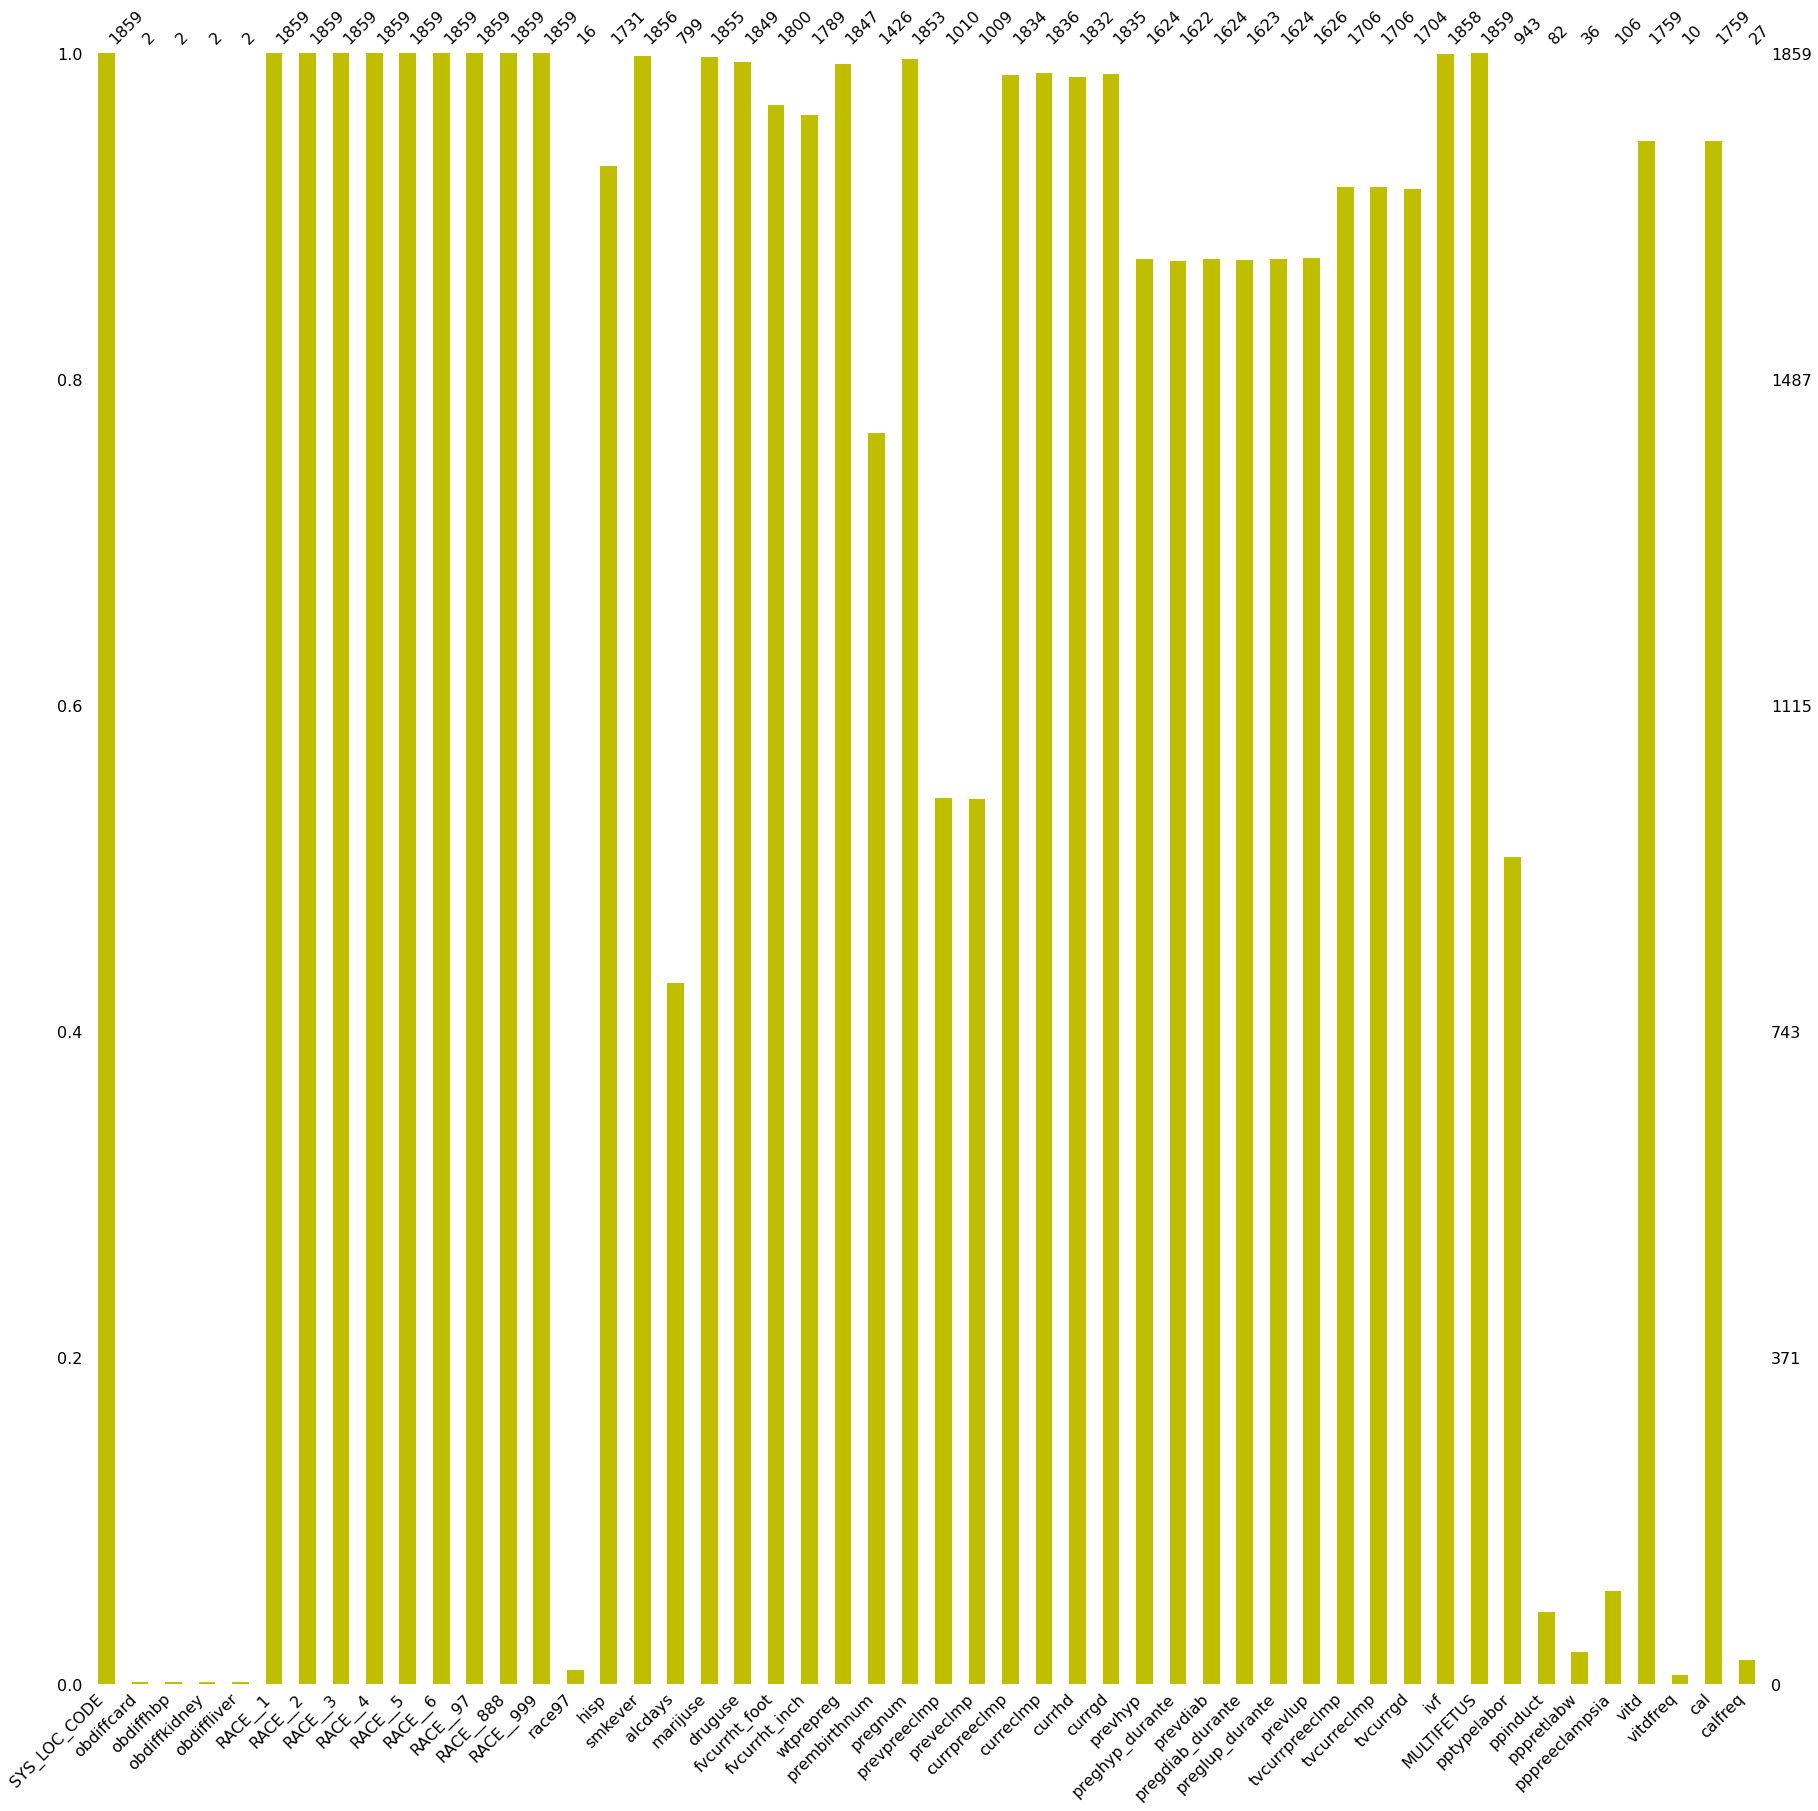

In [40]:
msno.bar(data, color = 'y', figsize = (30,30))

This bar chart gives you an idea about how many missing values are there in each column. 

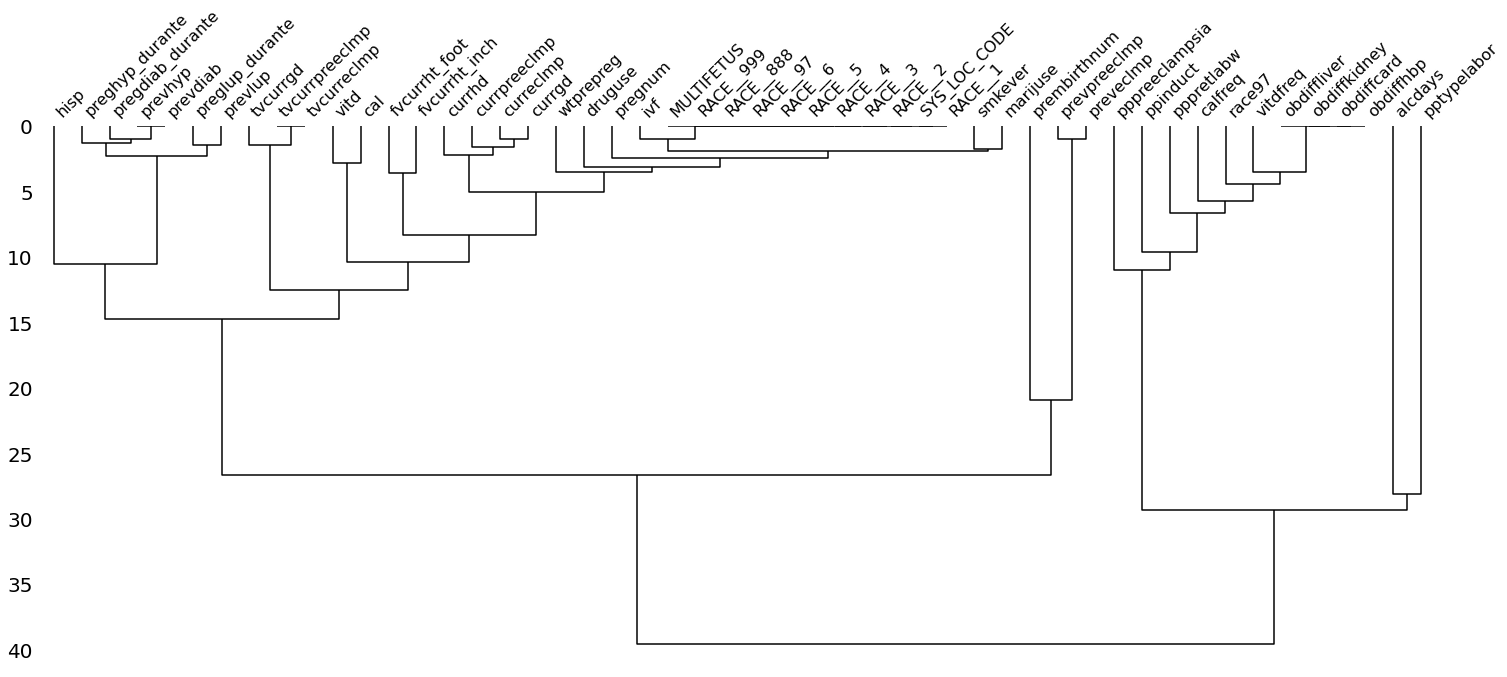

In [41]:
ax = msno.dendrogram(data)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

## Checking for Missing Values Numerically

The following table gives the percentage of missing values in each column

In [42]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
obdiffliver,1857,99.892415
obdiffcard,1857,99.892415
obdiffhbp,1857,99.892415
obdiffkidney,1857,99.892415
vitdfreq,1849,99.462076
race97,1843,99.139322
calfreq,1832,98.547606
pppretlabw,1823,98.063475
ppinduct,1777,95.589026
pppreeclampsia,1753,94.298010


In [43]:
#no. of valid values in each column
data.notnull().sum().sort_values(ascending=False)

SYS_LOC_CODE        1859
RACE__1             1859
RACE__2             1859
RACE__3             1859
RACE__4             1859
RACE__5             1859
RACE__6             1859
MULTIFETUS          1859
RACE__97            1859
RACE__888           1859
RACE__999           1859
ivf                 1858
smkever             1856
marijuse            1855
pregnum             1853
druguse             1849
wtprepreg           1847
curreclmp           1836
currgd              1835
currpreeclmp        1834
currhd              1832
fvcurrht_foot       1800
fvcurrht_inch       1789
vitd                1759
cal                 1759
hisp                1731
tvcurreclmp         1706
tvcurrpreeclmp      1706
tvcurrgd            1704
prevlup             1626
preglup_durante     1624
prevdiab            1624
prevhyp             1624
pregdiab_durante    1623
preghyp_durante     1622
prembirthnum        1426
prevpreeclmp        1010
preveclmp           1009
pptypelabor          943
alcdays              799
